In [1]:
import numpy as np
import pandas as pd

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it late
import librosa
#import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf 
print ("Done")

Done


In [2]:
ravdess = "D:\\SEM 6\\NLP\\Innovative\\Actors"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [3]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess +'/' + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess +'/' + i + '/' + f)

In [4]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-01-01-01-01-24.wav
03
D:\SEM 6\NLP\Innovative\Actors/Actor_01/03-01-01-01-01-01-01.wav
8
03-01-08-02-02-02-24.wav


In [5]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',
                             8:'Surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0  Neutral  D:\SEM 6\NLP\Innovative\Actors/Actor_01/03-01-...
1  Neutral  D:\SEM 6\NLP\Innovative\Actors/Actor_01/03-01-...
2  Neutral  D:\SEM 6\NLP\Innovative\Actors/Actor_01/03-01-...
3  Neutral  D:\SEM 6\NLP\Innovative\Actors/Actor_01/03-01-...
4     Calm  D:\SEM 6\NLP\Innovative\Actors/Actor_01/03-01-...
______________________________________________
      Emotions                                               Path
1435  Surprise  D:\SEM 6\NLP\Innovative\Actors/Actor_24/03-01-...
1436  Surprise  D:\SEM 6\NLP\Innovative\Actors/Actor_24/03-01-...
1437  Surprise  D:\SEM 6\NLP\Innovative\Actors/Actor_24/03-01-...
1438  Surprise  D:\SEM 6\NLP\Innovative\Actors/Actor_24/03-01-...
1439  Surprise  D:\SEM 6\NLP\Innovative\Actors/Actor_24/03-01-...
_______________________________________________
Calm        192
Happy       192
Sad         192
Angry       192
Fear        192
Disgust     192
Surprise    192
Neutral      96
Name: Emo

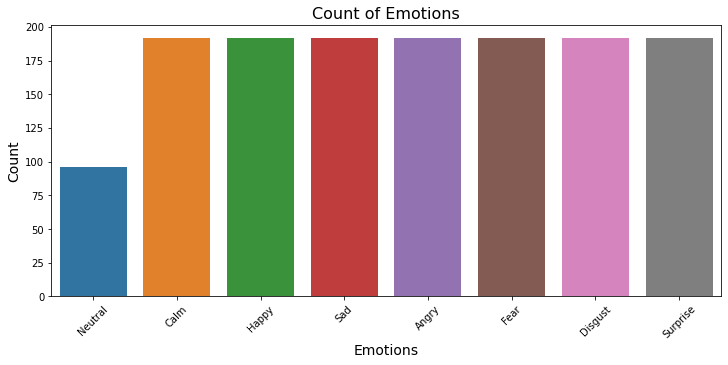

In [6]:

plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(ravdess_df.Emotions)
plt.ylabel('Count', size=14)
plt.xlabel('Emotions', size=14)
plt.xticks(rotation=45)
plt.show()

In [7]:
data,sr = librosa.load(file_path[0])
sr

22050

In [8]:
ipd.Audio(data,rate=sr)

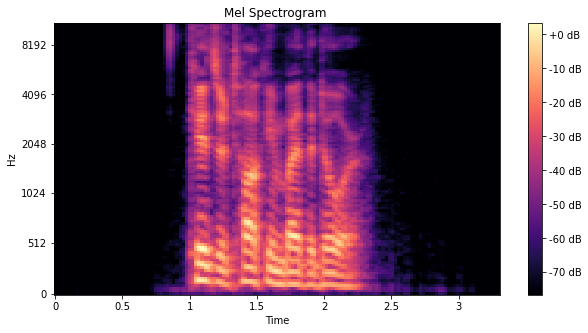

In [9]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

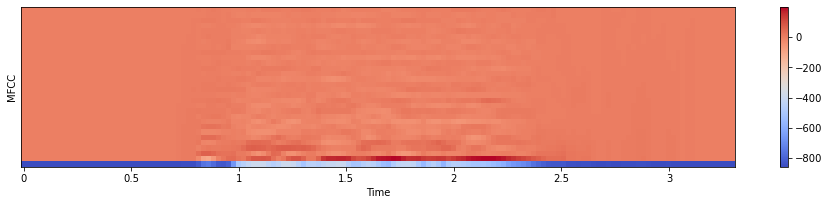

In [10]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [11]:
#DATA AUGMENTATION

In [12]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

    

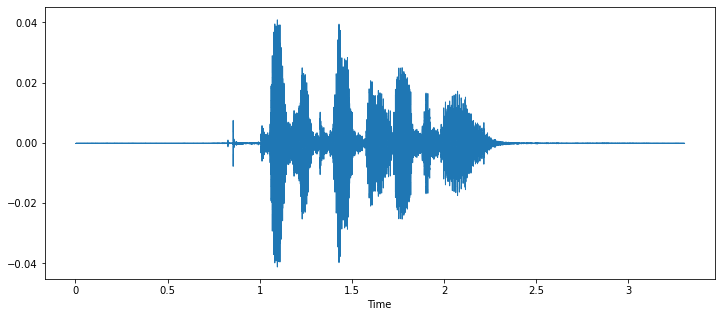

In [13]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

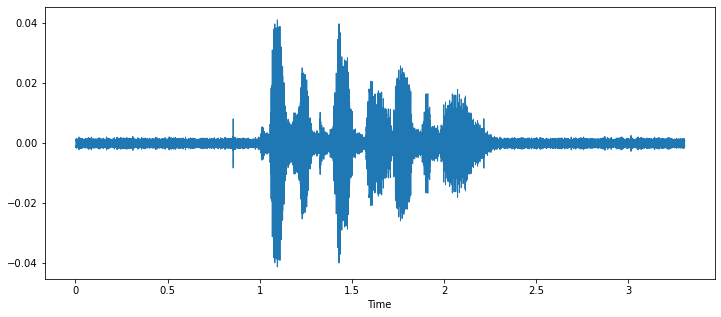

In [14]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [15]:
# STRETCHED AUDIO
# x = stretch(data)
# plt.figure(figsize=(12, 5))
# librosa.display.waveshow(y=x, sr=sr)
# ipd.Audio(x, rate=sr)

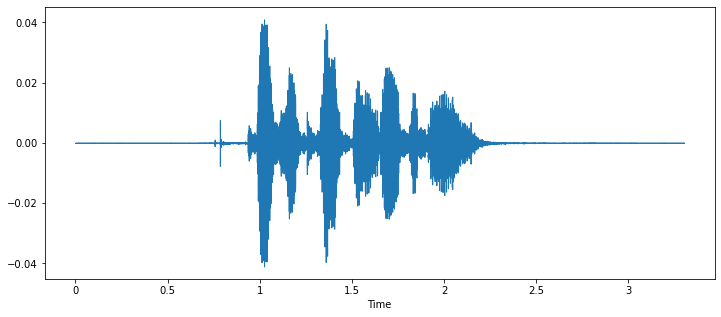

In [16]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [17]:
# AUDIO WITH PITCH
# x = pitch(data, sr)
# plt.figure(figsize=(12, 5))
# librosa.display.waveshow(y=x, sr=sr)
# ipd.Audio(x, rate=sr)


In [18]:
#feature extraction

In [19]:
def feat_ext(data):
    #Time_domain_features
    # ZCR Persody features or Low level ascoustic features
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally
    #Frequency_domain_features
    #Spectral and wavelet Features
    #MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr,n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally
    return result

def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feat_ext(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    #new_data = stretch(data)
    #data_stretch_pitch = pitch(new_data, sample_rate)
    #res3 = feat_ext(data_stretch_pitch)
    #result = np.vstack((result, res3))
    return result

In [20]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


In [21]:
from joblib import Parallel, delayed
import timeit
start = timeit.default_timer()
# Define a function to get features for a single audio file
def get_features(path, emotion):
    print(path)
    feature = get_feat(path)
    X, Y = [], []
    for ele in feature:
        X.append(ele)
        Y.append(emotion)
    return X, Y

# Call the get_features function in parallel for all audio files
X, Y = [], []
results = Parallel(n_jobs=-1)(delayed(get_features)(path, emotion) for path, emotion in zip(ravdess_df['Path'], ravdess_df['Emotions']))
for result in results:
    X.extend(result[0])
    Y.extend(result[1])
stop = timeit.default_timer()

print('Time: ', stop - start)    

#without multiprocessing it took 6 min to execute
# from joblib import Parallel, delayed
# import timeit
# start = timeit.default_timer()
# X , Y = [], []
# for path, emotion in zip(ravdess_df['Path'] , ravdess_df['Emotions']):
#     print(path)
#     feature = get_feat(path)
#     for ele in feature:
#        X.append(ele)
#        Y.append(emotion)
# stop = timeit.default_timer()

# print('Time: ', stop - start)   

Time:  28.342926400000003


In [22]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('speech_emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,Emotions
0,0.321275,-645.880737,72.619637,0.841305,16.399446,10.241591,0.653901,-4.328002,-4.258932,-14.575824,...,-2.780704,-3.576632,-2.455497,-4.275354,-2.060977,-1.432523,-2.322279,-4.633035,-2.025275,Neutral
1,0.297657,-491.314462,40.124495,6.227848,11.103774,7.230993,-1.153957,-4.508534,-6.989858,-10.667265,...,-3.158744,-1.993024,-2.343695,-3.198709,-1.990399,-1.142722,-2.228189,-3.573167,-2.991775,Neutral
2,0.293566,-634.663269,72.324066,-2.998578,20.209740,10.674217,-1.151011,-2.813592,-7.923956,-16.231958,...,-3.665341,-2.948025,-3.360369,-4.123194,-1.116632,-1.728049,-4.136899,-4.284535,-3.083479,Neutral
3,0.286137,-497.297071,40.325783,5.972273,13.497509,7.454323,-1.347913,-3.374595,-8.995649,-11.827233,...,-2.632638,-2.547456,-3.001678,-3.437211,-1.885828,-1.562997,-3.403819,-3.570019,-2.673635,Neutral
4,0.337678,-643.285645,74.262268,-1.228256,16.242317,5.608830,0.250306,-4.034254,-8.218330,-14.603807,...,-2.913286,-3.239267,-2.613838,-3.737037,-2.716571,-1.575936,-3.650818,-4.688081,-3.030789,Neutral


In [24]:
Emotions = pd.read_csv("speech_emotion.csv")
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,Emotions
0,0.321275,-645.880737,72.619637,0.841305,16.399446,10.241591,0.653901,-4.328002,-4.258932,-14.575824,...,-2.780704,-3.576632,-2.455497,-4.275354,-2.060977,-1.432523,-2.322279,-4.633035,-2.025275,Neutral
1,0.297657,-491.314462,40.124495,6.227848,11.103774,7.230993,-1.153957,-4.508534,-6.989858,-10.667265,...,-3.158744,-1.993024,-2.343695,-3.198709,-1.990399,-1.142722,-2.228189,-3.573167,-2.991775,Neutral
2,0.293566,-634.663269,72.324066,-2.998578,20.209740,10.674217,-1.151011,-2.813592,-7.923956,-16.231958,...,-3.665341,-2.948025,-3.360369,-4.123194,-1.116632,-1.728049,-4.136899,-4.284535,-3.083479,Neutral
3,0.286137,-497.297071,40.325783,5.972273,13.497509,7.454323,-1.347913,-3.374595,-8.995649,-11.827233,...,-2.632638,-2.547456,-3.001678,-3.437211,-1.885828,-1.562997,-3.403819,-3.570019,-2.673635,Neutral
4,0.337678,-643.285645,74.262268,-1.228256,16.242317,5.608830,0.250306,-4.034254,-8.218330,-14.603807,...,-2.913286,-3.239267,-2.613838,-3.737037,-2.716571,-1.575936,-3.650818,-4.688081,-3.030789,Neutral


In [25]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions

X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values
X

array([[ 3.21275499e-01, -6.45880737e+02,  7.26196365e+01, ...,
        -2.32227921e+00, -4.63303471e+00, -2.02527452e+00],
       [ 2.97657154e-01, -4.91314462e+02,  4.01244951e+01, ...,
        -2.22818946e+00, -3.57316674e+00, -2.99177464e+00],
       [ 2.93565538e-01, -6.34663269e+02,  7.23240662e+01, ...,
        -4.13689852e+00, -4.28453541e+00, -3.08347917e+00],
       ...,
       [ 2.96255606e-01, -2.85030133e+02,  1.42040846e+01, ...,
        -2.33030119e-01, -1.10164435e+00,  4.80814964e-01],
       [ 2.19970703e-01, -4.48716217e+02,  4.07629356e+01, ...,
        -4.30033892e-01, -2.25442863e+00,  4.50950503e-01],
       [ 3.46991645e-01, -2.38573278e+02,  1.29073263e+01, ...,
        -2.54998354e-01, -1.36757158e+00, -7.96285191e-01]])

In [26]:
Y

array(['Neutral', 'Neutral', 'Neutral', ..., 'Surprise', 'Surprise',
       'Surprise'], dtype=object)

In [27]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [28]:
print(Y.shape)
X.shape

(2880, 8)


(2880, 41)

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2160, 41), (2160, 8), (720, 41), (720, 8))

In [30]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [31]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2160, 41), (2160, 8), (720, 41), (720, 8))

In [32]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,mode='auto')
es=EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

In [33]:
#LSTM model
model01=Sequential()
model01.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
model01.add(Dropout(0.2))
model01.add(LSTM(128,return_sequences=True))
model01.add(Dropout(0.2))
model01.add(LSTM(128))
model01.add(Dropout(0.2))
model01.add(Dense(8,activation = 'softmax'))
model01.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 41, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 41, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 41, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 41, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 41, 128)           131584    
                                                                 
 dropout_2 (Dropout)         (None, 41, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 41, 128)           1

In [34]:
hist=model01.fit(X_train, y_train,
            epochs=100,
            validation_data=(X_test, y_test),batch_size=65,
            verbose=1)



Epoch 1/100
34/34 [==============================] - 30s 441ms/step - loss: 1.9778 - accuracy: 0.2028 - val_loss: 1.9596 - val_accuracy: 0.2431
Epoch 2/100
34/34 [==============================] - 13s 391ms/step - loss: 1.8955 - accuracy: 0.2481 - val_loss: 1.8801 - val_accuracy: 0.3153
Epoch 3/100
34/34 [==============================] - 11s 321ms/step - loss: 1.8534 - accuracy: 0.2690 - val_loss: 1.9869 - val_accuracy: 0.2306
Epoch 4/100
34/34 [==============================] - 11s 330ms/step - loss: 1.8436 - accuracy: 0.2759 - val_loss: 1.8337 - val_accuracy: 0.2792
Epoch 5/100
34/34 [==============================] - 12s 345ms/step - loss: 1.7732 - accuracy: 0.3120 - val_loss: 1.8099 - val_accuracy: 0.3125
Epoch 6/100
34/34 [==============================] - 13s 371ms/step - loss: 1.7602 - accuracy: 0.3185 - val_loss: 1.7964 - val_accuracy: 0.3153
Epoch 7/100
34/34 [==============================] - 12s 347ms/step - loss: 1.7538 - accuracy: 0.3231 - val_loss: 1.8070 - val_accuracy:

34/34 [==============================] - 12s 360ms/step - loss: 0.7455 - accuracy: 0.7292 - val_loss: 1.5315 - val_accuracy: 0.4694
Epoch 58/100
34/34 [==============================] - 13s 379ms/step - loss: 0.7978 - accuracy: 0.7023 - val_loss: 1.5219 - val_accuracy: 0.4764
Epoch 59/100
34/34 [==============================] - 24s 703ms/step - loss: 0.7789 - accuracy: 0.7088 - val_loss: 1.5418 - val_accuracy: 0.4986
Epoch 60/100
34/34 [==============================] - 18s 539ms/step - loss: 0.7469 - accuracy: 0.7273 - val_loss: 1.5022 - val_accuracy: 0.5056
Epoch 61/100
34/34 [==============================] - 14s 419ms/step - loss: 0.6995 - accuracy: 0.7449 - val_loss: 1.5325 - val_accuracy: 0.4944
Epoch 62/100
34/34 [==============================] - 12s 366ms/step - loss: 0.7186 - accuracy: 0.7315 - val_loss: 1.5194 - val_accuracy: 0.5028
Epoch 63/100
34/34 [==============================] - 13s 378ms/step - loss: 0.7010 - accuracy: 0.7486 - val_loss: 1.5404 - val_accuracy: 0.484

23/23 [==============================] - 1s 59ms/step - loss: 1.9414 - accuracy: 0.5222
Accuracy of our model on test data :  52.222222089767456 %


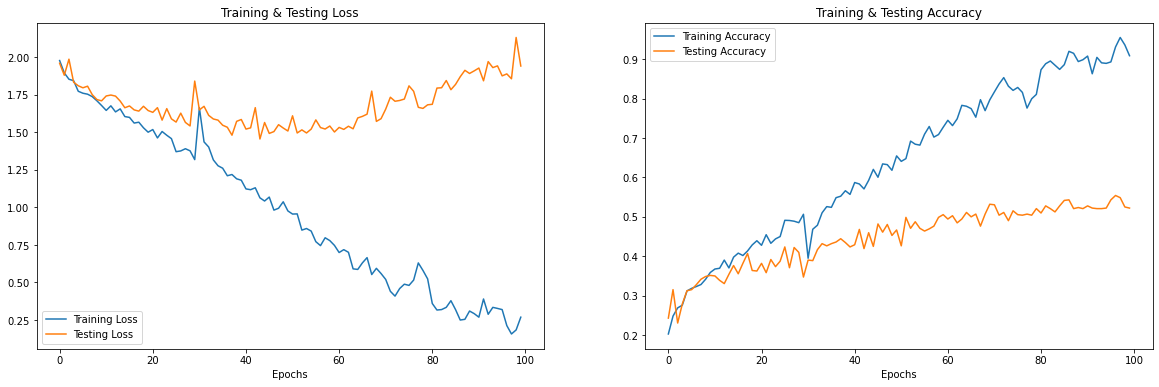

In [35]:
print("Accuracy of our model on test data : " , model01.evaluate(X_test,y_test)[1]*100 , "%")
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [45]:
#CNN MODEL
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((2160, 41, 1), (2160, 8), (720, 41, 1), (720, 8))

In [46]:
model = Sequential()
model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(LSTM(256, return_sequences=True))

model.add(LSTM(128))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='softmax'))
optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 41, 2048)          12288     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 21, 2048)         0         
 1D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 21, 2048)         8192      
 hNormalization)                                                 
                                                                 
 conv1d_4 (Conv1D)           (None, 21, 1024)          10486784  
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 11, 1024)         0         
 1D)                                                             
                                                      

In [42]:
!pip install pydot

In [43]:
!pip install graphviz

In [47]:
from keras.utils.vis_utils import plot_model
plot_model( model, show_shapes=True, show_layer_names=True, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [48]:
#CNN
history =  model.fit(x_traincnn, y_train, batch_size=64, epochs=50, validation_data=(x_testcnn, y_test))

Epoch 1/50
34/34 [==============================] - 45s 1s/step - loss: 2.0816 - accuracy: 0.1606 - val_loss: 2.0873 - val_accuracy: 0.1181
Epoch 2/50
34/34 [==============================] - 38s 1s/step - loss: 2.0163 - accuracy: 0.2194 - val_loss: 2.1227 - val_accuracy: 0.1181
Epoch 3/50
34/34 [==============================] - 36s 1s/step - loss: 1.9679 - accuracy: 0.2361 - val_loss: 2.3817 - val_accuracy: 0.1181
Epoch 4/50
34/34 [==============================] - 36s 1s/step - loss: 1.8969 - accuracy: 0.2676 - val_loss: 2.2219 - val_accuracy: 0.1181
Epoch 5/50
34/34 [==============================] - 36s 1s/step - loss: 1.8306 - accuracy: 0.2972 - val_loss: 2.3930 - val_accuracy: 0.1181
Epoch 6/50
34/34 [==============================] - 46s 1s/step - loss: 1.7923 - accuracy: 0.3083 - val_loss: 2.2667 - val_accuracy: 0.1181
Epoch 7/50
34/34 [==============================] - 40s 1s/step - loss: 1.6942 - accuracy: 0.3343 - val_loss: 2.1344 - val_accuracy: 0.1667
Epoch 8/50
34/34 [==

In [49]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

23/23 [==============================] - 3s 118ms/step - loss: 2.0077 - accuracy: 0.6875
Accuracy of our model on test data :  68.75 %


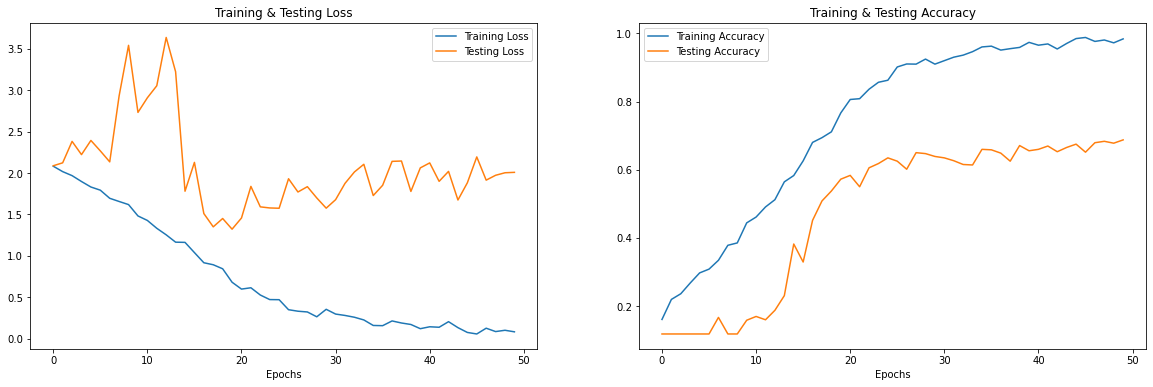

In [50]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [51]:
# predicting on test data.
pred_test = model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)
y_test1 = encoder.inverse_transform(y_test)

# Check for random predictions
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test1.flatten()

df.head(10)


23/23 [==============================] - 4s 127ms/step


,Predicted Labels,Actual Labels
0,Disgust,Disgust
1,Happy,Disgust
2,Calm,Calm
3,Calm,Calm
4,Neutral,Neutral
5,Sad,Calm
6,Happy,Sad
7,Calm,Calm
8,Neutral,Neutral
9,Neutral,Disgust


In [52]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("cnn.h5")
print("Saved model to disk") 

Saved model to disk


In [53]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('cnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("cnn.h5")
print("Loaded model from disk")

Loaded model from disk


In [54]:
loaded_model.compile(optimizer=SGD(lr=0.001, decay=1e-6, momentum=0.8), loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

23/23 [==============================] - 5s 123ms/step - loss: 2.0077 - accuracy: 0.6875
accuracy: 68.75%


In [55]:
import joblib

#saving scaler
joblib.dump(scaler, 'scaler.joblib')

#loading our scaler

scaler = joblib.load('scaler.joblib')

#saving our encoder

joblib.dump(encoder, 'encoder.joblib')

#loading our encoder

encoder= joblib.load('encoder.joblib')

In [56]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=feat_ext(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,41))
    i_result = scaler.transform(result)
    final_result=np.expand_dims(i_result, axis=2)
    
    return final_result

In [57]:
res=get_predict_feat("output10.wav")
print(res.shape)

(1, 41, 1)


In [58]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder.inverse_transform(predictions)
    print(y_pred[0][0])    

In [61]:
prediction("output.wav")

1/1 [==============================] - 0s 63ms/step
Happy
